In [170]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [171]:
conn = sqlite3.connect('student_grades.db')
cursor = conn.cursor()

In [172]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
  student_id INTEGER PRIMARY KEY AUTOINCREMENT,
  first_name TEXT,
  last_name TEXT
)
''')
conn.commit()

In [173]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
  grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
  student_id INTEGER,
  subject TEXT,
  grade INTEGER,
  FOREIGN KEY(student_id) REFERENCES students(student_id)
)
''')
conn.commit()

In [174]:
students = [
  ('Alice', 'Johnson'),
  ('Bob', 'Smith'),
  ('Carol', 'White'),
  ('David', 'Brown'),
  ('Eve', 'Davis'),
    ('David', 'Nu Nu')
]
cursor.executemany('INSERT INTO students (first_name, last_name) VALUES (?, ?)', students)
conn.commit()


In [175]:
grades = [
  (1, 'Math', 95),
  (1, 'English', 88),
  (1, 'History', 90),
  (2, 'Math', 82),
  (2, 'English', 76),
  (2, 'History', 85),
]
cursor.executemany('INSERT INTO grades (student_id, subject, grade) VALUES (?, ?, ?)', grades)
conn.commit()


In [176]:
pd.read_sql_query("SELECT * FROM students", conn) #Checking to see if it repeats the students, and give display


,student_id,first_name,last_name
0,1,Alice,Johnson
1,2,Bob,Smith
2,3,Carol,White
3,4,David,Brown
4,5,Eve,Davis
...,...,...,...
60,61,Bob,Smith
61,62,Carol,White
62,63,David,Brown
63,64,Eve,Davis


In [205]:
students_grades_query = '''
SELECT s.first_name, s.last_name, g.subject, g.grade
FROM students s
JOIN grades g ON s.student_id = g.student_id
'''
df_students_grades = pd.read_sql_query(students_grades_query, conn) #I'm just gonna do "pd." or PANDA everytime instead to keep track if code works or not
print(df_students_grades)

   first_name last_name  subject  grade
0       Alice   Johnson     Math     95
1       Alice   Johnson  English     88
2       Alice   Johnson  History     90
3         Bob     Smith     Math     82
4         Bob     Smith  English     76
..        ...       ...      ...    ...
61      Alice   Johnson  English     88
62      Alice   Johnson  History     90
63        Bob     Smith     Math     82
64        Bob     Smith  English     76
65        Bob     Smith  History     85

[66 rows x 4 columns]


In [178]:
average_grade_per_student_query = '''
SELECT s.first_name, s.last_name, AVG(g.grade) AS average_grade
FROM students s
JOIN grades g ON s.student_id = g.student_id
GROUP BY s.student_id
'''
df_average_grades = pd.read_sql_query(average_grade_per_student_query, conn)
print(df_average_grades)

  first_name last_name  average_grade
0      Alice   Johnson           91.0
1        Bob     Smith           81.0


In [179]:
highest_average_grade_student_query = '''
SELECT s.first_name, s.last_name, AVG(g.grade) AS average_grade
FROM students s
JOIN grades g ON s.student_id = g.student_id
GROUP BY s.student_id
ORDER BY average_grade DESC
LIMIT 1
'''
highest_avg_grade_student = pd.read_sql_query(highest_average_grade_student_query, conn)
print(highest_avg_grade_student)

  first_name last_name  average_grade
0      Alice   Johnson           91.0


In [180]:
average_grade_math_query = '''
SELECT AVG(grade) AS average_grade_math
FROM grades
WHERE subject = 'Math'
'''
average_grade_math = pd.read_sql_query(average_grade_math_query, conn)
print(average_grade_math)


   average_grade_math
0                88.5


In [181]:
students_scoring_above_90_query = '''
SELECT DISTINCT s.first_name, s.last_name
FROM students s
JOIN grades g ON s.student_id = g.student_id
WHERE g.grade > 90
'''
students_above_90 = pd.read_sql_query(students_scoring_above_90_query, conn)
print(students_above_90)

  first_name last_name
0      Alice   Johnson


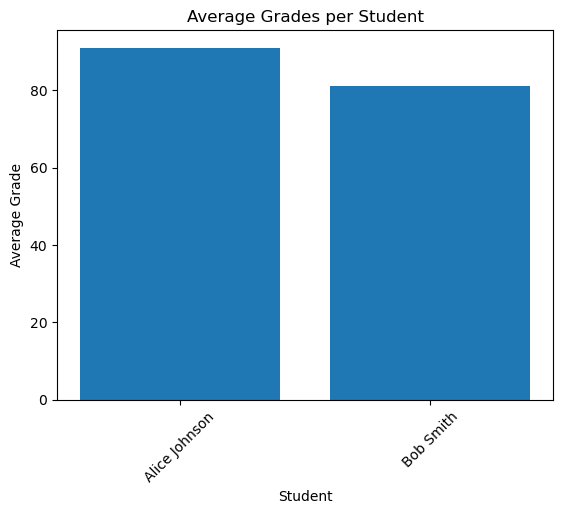

In [207]:
#https://www.tutorialspoint.com/jupyter/jupyter_notebook_plotting.htm 
#plt as Matplotlib
plt.bar(df_average_grades['first_name'] + ' ' + df_average_grades['last_name'], df_average_grades['average_grade'])
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.title('Average Grades per Student')
plt.xticks(rotation=45)
plt.show()

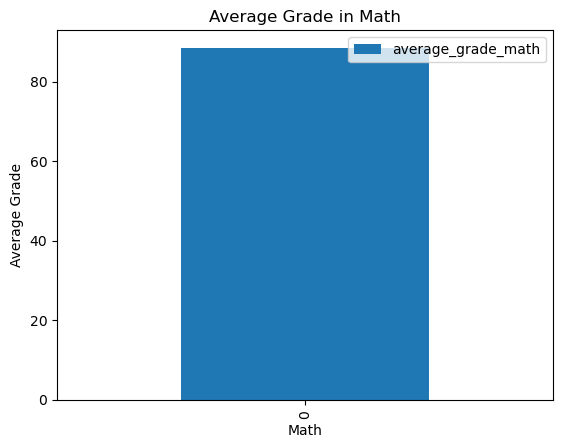

In [203]:
average_grade_math.plot(kind='bar', title='Average Grade in Math')
plt.xlabel('Math')
plt.ylabel('Average Grade')
plt.show()
#https://www.tutorialspoint.com/jupyter/jupyter_notebook_plotting.htm